In [166]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[8,8]   # set the size of figure to be this value in the entire colab default is 6 x 6
plt.rcParams['font.size']=10

In [167]:
# Decision Stump is basically when thers only one node and twp chidlren left and right
#1
def entropy(p):
  if p==0 or p==1: # the purest node
    return 0
  return -p*np.log2(p)-(1-p)*np.log2(1-p) # the most impure node is when a node contains half positives and negatives in it



In [168]:
entropy(200/1000)

np.float64(0.7219280948873623)

Text(0, 0.5, 'Entropy')

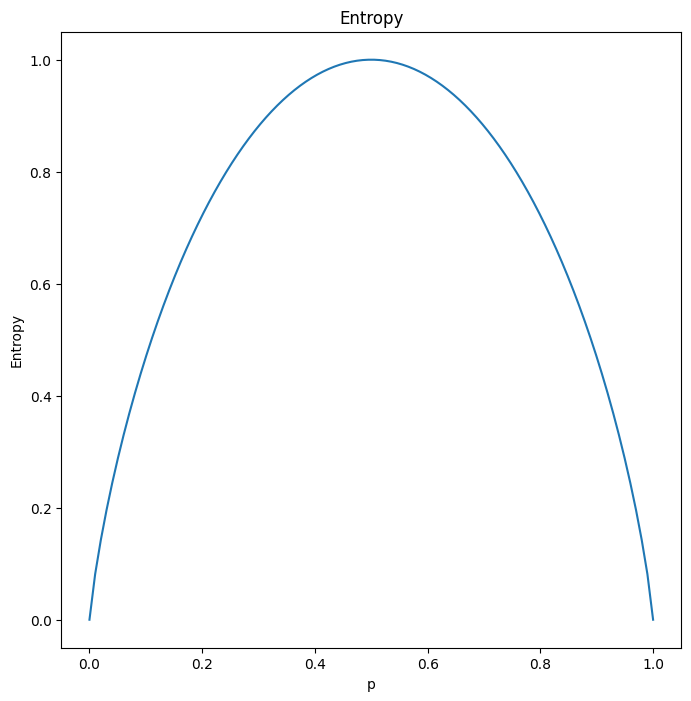

In [169]:
p=np.linspace(0,1,100)
plt.plot(p,[entropy(x) for x in p])
plt.title('Entropy')
plt.xlabel('p')
plt.ylabel('Entropy')

In [170]:
#2
def info_gain(E,El,Er,gamma):
  return E-(gamma*El+(1-gamma)*Er)

E=entropy(200/1000)
El=entropy(50/100)
Er=entropy(150/900)
gamma=100/1000
info_gain(E,El,Er,gamma)

np.float64(0.03690791540384364)

In [171]:
#3
n=1000
p=0.4  # 400 points of class +1 in parent node 600 class -1
gamma=0.7 # 700 dpoints in left child
qmax=p/gamma  # q meaning proportion of 1 in the left child as all datapoints in parent gp to left node
qmin=(p+gamma-1)/gamma # only 300 can go in right child therefore 100 in left child

print(qmax,qmin)

0.5714285714285715 0.142857142857143


Text(0, 0.5, 'Information Gain')

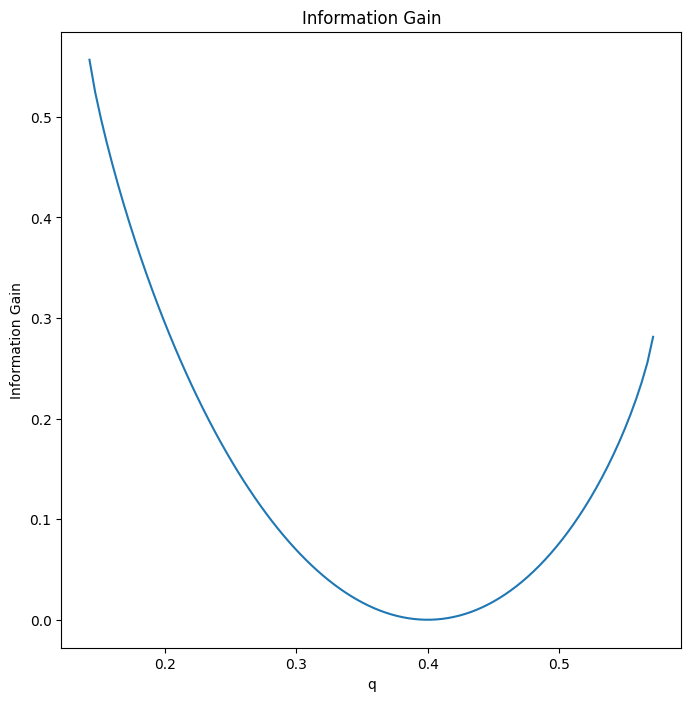

In [172]:
#4
q=np.linspace(qmin,qmax,100)
r=(p-gamma*q)/(1-gamma)  #proportion of dpoints of class 1 in right child confusing

E=entropy(p)
El=np.array(([entropy(x) for x in q]))
Er=np.array(([entropy(x) for x in r]))
ig=info_gain(E,El,Er,gamma)

plt.plot(q,ig)
plt.title('Information Gain')
plt.xlabel('q')
plt.ylabel('Information Gain')


In [173]:
#4
rng=np.random.default_rng(seed=1001)
n_per=50
cov=np.eye(2)/10
X1=rng.multivariate_normal([1,1],cov,n_per)
y1=np.ones(n_per)
X2=rng.multivariate_normal([5,3],cov,n_per)
y2=np.zeros(n_per)
X3=rng.multivariate_normal([3,4],cov,n_per)
y3=np.ones(n_per)
X4=rng.multivariate_normal([3,2],cov,n_per)
y4=np.zeros(n_per)
X=np.concatenate((X1,X2,X3,X4))
y=np.int64(np.concatenate((y1,y2,y3,y4)))

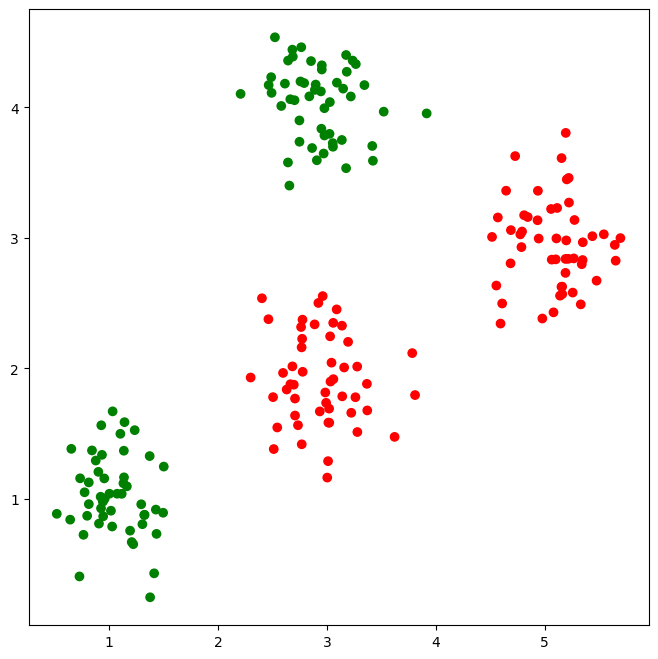

In [174]:
c=np.array(['red','green'])
# X=X.T
# c[y]
plt.scatter(X[:,0],X[:,1],c=c[y])

In [175]:
# decision stump find the best q
# fins the feature best, info best, threshold best

def best_split(X,y):
  min_val,max_val=np.min(X),np.max(X)
  vals=np.linspace(min_val,max_val,10)
  p=X[y==1].shape[0]/X.shape[0]
  E=entropy(p)

  ig_best,value_best,feat_best=0,0,0
  for val in vals:
    for feat in[0,1]:  # two features
      left=y[X[:,feat]<val]
      right=y[X[:,feat]>=val]    # question asking
      gamma=left.shape[0]/X.shape[0]
      El=entropy(left.shape[0]/X.shape[0]) # proportion in left child
      q=r=0
      if left.shape[0]!=0:
        q=left[left==1].shape[0]/left.shape[0]
      if right.shape[0]!=0:
        r=right[right==1].shape[0]/right.shape[0]
      El=entropy(q)
      Er=entropy(r)
      ig=info_gain(E,El,Er,gamma)
      if ig>ig_best:
        ig_best=ig
        value_best=val
        feat_best=feat
  return feat_best,value_best,ig_best


In [176]:
best_split(X,y)

(0, np.float64(2.0612616131244654), np.float64(0.31127812445913283))

In [177]:
#5
# tree from ds
class TreeNode:
  def __init__(self,feature=None,threshold=None,left=None,right=None,value=None):
    self.feature=feature
    self.threshold=threshold
    self.left=left
    self.right=right
    self.value=value  # if the value in not none it is a leaf node

def grow_tree(X,y,depth=0): # recursion till pure node
  if len(set(y))==1:  # one class is there in a node
    return TreeNode(value=y[0]) #assign the class value

  feature,threshold,ig=best_split(X,y)

  left_ind=X[:,feature]<threshold
  right_ind=X[:,feature]>=threshold

  left_child=grow_tree(X[left_ind,:],y[left_ind],depth+1)
  right_child=grow_tree(X[right_ind,:],y[right_ind],depth+1)

  return TreeNode(feature=feature,threshold=threshold,left=left_child,right=right_child)

def count_node(node):
  if node is None:
    return 0,0
  if node.value is not None: # it is a leaf node
    return 0,1
  else:
    left_internal,left_leaf=count_node(node.left)
    right_internal,right_leaf=count_node(node.right)
    return left_internal+right_internal+1,left_leaf+right_leaf


In [178]:
tree=grow_tree(X,y)
internal_nodes,leaf_nodes=count_node(tree)
print(internal_nodes,leaf_nodes)

3 4


In [179]:
#6
def predict(tree,x):
  if tree.value is not None:
    return tree.value
  if x[tree.feature]<tree.threshold:
    return predict(tree.left,x)
  else:
    return predict(tree.right,x)

predict(tree,np.array([3,4]))

np.int64(1)

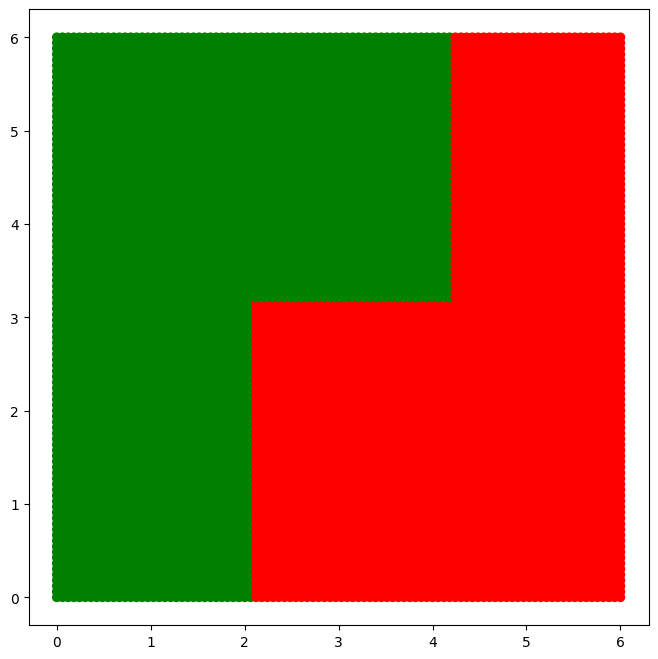

In [180]:
x=np.linspace(0,6,100)
floor=[]
color=[]
for i in range(x.shape[0]):
  for j in range(x.shape[0]):
    floor.append([x[i],x[j]])
    color.append(c[predict(tree,np.array([x[i],x[j]]))])
floor=np.array(floor)
plt.scatter(floor[:,0],floor[:,1],c=color)

In [181]:
rng=np.random.default_rng(seed=1001)
X=rng.uniform(-10,10,(100,2))
y=np.int32(np.zeros(X.shape[0]))
y[X[:,1]>X[:,0]]=1
X=np.concatenate((X,rng.multivariate_normal([-5,5],np.eye(2),10)),axis=0)
y=np.concatenate((y,np.int32(np.zeros(10))))

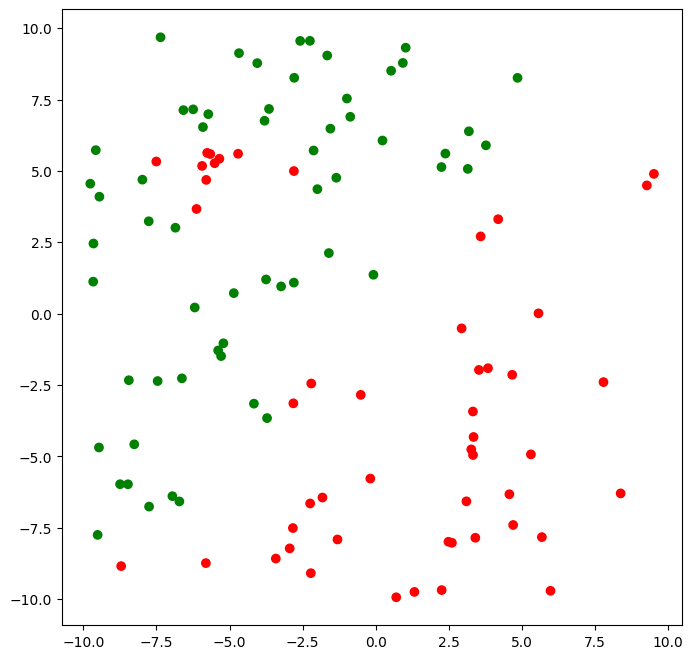

In [182]:
c=np.array(['red','green'])
plt.scatter(X[:,0],X[:,1],c=c[y])

In [183]:
def predict(X,y,x_test,k):
  dist=np.linalg.norm(X-x_test.reshape(1,2),axis=1)
  nearest_k=np.argsort(dist)[:k]
  voter=y[nearest_k]
  if sum(voter)>len(voter)/2:
    return 1
  return 0

In [184]:
predict(X,y,np.array([-3,2]),10)

1

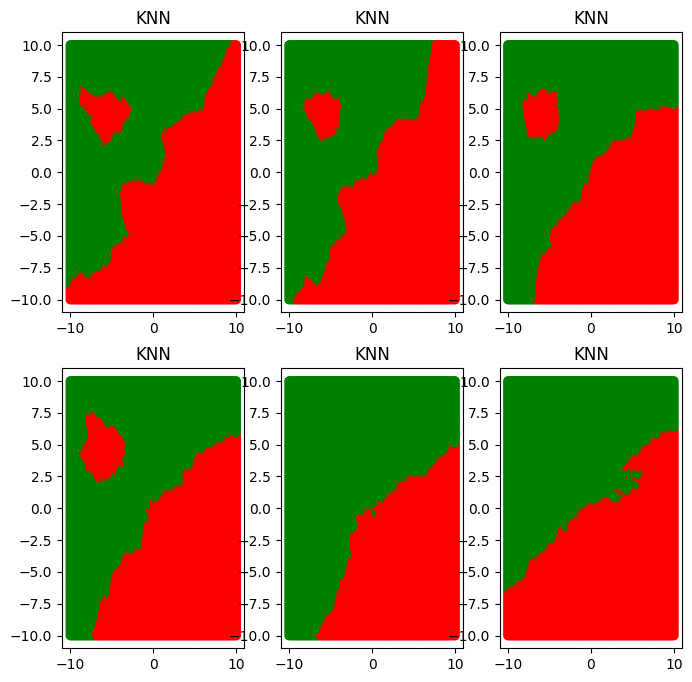

In [188]:
def boundary(k):
  x=np.linspace(-10,10,100)
  floor=[]
  color=[]
  for i in range(x.shape[0]):
    for j in range(x.shape[0]):
      floor.append([x[i],x[j]])
      color.append(c[predict(X,y,np.array([x[i],x[j]]),k)])
  floor=np.array(floor)
  plt.scatter(floor[:,0],floor[:,1],c=color)
  plt.title('KNN')

for i,k in enumerate([1,3,7,15,31,63]):
  plt.subplot(2,3,i+1)
  boundary(k)